# CP321 Data Visualization Project
Connor Hagen: 180575650

Chandra Keerthi: 180860940
#### Question: In the year 2012, which industries have the highest internet usage, and what type of connection do they use the most?


In [1]:
#importing packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#importing dataset
df = pd.read_csv("industry.csv")
#filtering columns and rows
df2 = df[df["REF_DATE"] == 2012]
df3 = df2[['REF_DATE', 'North American Industry Classification System (NAICS)', 'Size of enterprise', 'Type of Internet connection', 'VALUE']]
df3

,REF_DATE,North American Industry Classification System (NAICS),Size of enterprise,Type of Internet connection,VALUE
0,2012,Private sector,"Total, all enterprises",Digital Subscriber Line,32.3
1,2012,Private sector,"Total, all enterprises",Cable modem,41.2
2,2012,Private sector,"Total, all enterprises",Mobile wireless,34.7
3,2012,Private sector,"Total, all enterprises",Satellite,3.8
4,2012,Private sector,"Total, all enterprises",Fibre optic line,8.6
...,...,...,...,...,...
1843,2012,Other services (except public administration) ...,Large size enterprises,Mobile wireless,NaN
1844,2012,Other services (except public administration) ...,Large size enterprises,Satellite,NaN
1845,2012,Other services (except public administration) ...,Large size enterprises,Fibre optic line,80.6
1846,2012,Other services (except public administration) ...,Large size enterprises,Dial-up over a telephone line,NaN


# Introduction
We have selected a dataset from this website: https://open.canada.ca/data/en/dataset/473274c3-c382-4857-a21f-55dfea7df3f2. 

This data consists of internet use by the type of internet connection, industry, and size of corporation in the years 2012 and 2013, but according to our question we will only be exploring data in the year 2012. 

Here are the list of variables found in the dataset:
- REF_DATE, a year ==> Numerical
- North American Industry Classification System (NAICS) ==> Categorical
- Size of Enterprise ==> Categorical
- Type of Internet Connection ==> Categorical
- VALUE, this column shows the percentage of type of internet connection a specific sector uses ==> Numerical

The goal of this exploration is to identify which industries have the highest internet usage, and what type of connection do they use the most. In addition we will be exploring other trends as well.

In [3]:
# we will start off by renaming columns so it is easier to access them throughout the project
df4 = df3.rename(columns = {'REF_DATE':'Date'})
df5 = df4.rename(columns = {'North American Industry Classification System (NAICS)':'Class'})
df6 = df5.rename(columns = {'VALUE':'Value'})
df7 = df6.rename(columns = {'Type of Internet connection':'Type'})
df8 = df7.rename(columns = {'Size of enterprise':'Size'})
#This data contains a size classification known as 'Total, all enterprises'. We believe this is a culumative total of all
#enterprises; all enterprises without a classification of small, medium, or large.
#Refine the search results to filter out the total. We won't worry about a total.
df8 = df8[df8['Size'] != 'Total, all enterprises']
df8

,Date,Class,Size,Type,Value
7,2012,Private sector,Small size enterprises,Digital Subscriber Line,30.7
8,2012,Private sector,Small size enterprises,Cable modem,41.3
9,2012,Private sector,Small size enterprises,Mobile wireless,33.9
10,2012,Private sector,Small size enterprises,Satellite,3.7
11,2012,Private sector,Small size enterprises,Fibre optic line,6.4
...,...,...,...,...,...
1843,2012,Other services (except public administration) ...,Large size enterprises,Mobile wireless,NaN
1844,2012,Other services (except public administration) ...,Large size enterprises,Satellite,NaN
1845,2012,Other services (except public administration) ...,Large size enterprises,Fibre optic line,80.6
1846,2012,Other services (except public administration) ...,Large size enterprises,Dial-up over a telephone line,NaN


Now that we have renamed our columns for easier access, and filtered out the rows for the year of 2012 as well as filter out unesscessary columns, we can compare specific industry to see what type of internet connection takes up their whole usage. 

# Data Exploration and Visualization

In [4]:
#Create small size enterprises dataframe.
dfSmall = df8[df8['Size'] == 'Small size enterprises']
dfSmall = dfSmall.dropna()
#Sort highest to lowest.
dfSmall = dfSmall.sort_values("Value",ascending= False)

#Create medium size enterprises dataframe.
dfMed = df8[df8['Size'] == 'Medium size enterprises']
dfMed = dfMed.dropna()
#Sort highest to lowest.
dfMed = dfMed.sort_values("Value",ascending= False)

#Create large size enterprises dataframe.
dfLarge = df8[df8['Size'] == 'Large size enterprises']
dfLarge = dfLarge.dropna()
#Sort highest to lowest.
dfLarge = dfLarge.sort_values("Value",ascending= False)

Small size enterprises     371
Medium size enterprises    371
Large size enterprises     357
Name: Size, dtype: int64


Text(0.5, 0, 'Count')

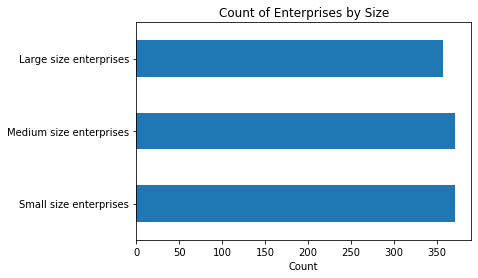

In [5]:
#Take a count of the different sizes.
counts = df8['Size'].value_counts()
print(counts)
#Plot counts.
plot = counts.plot(kind='barh', title='Count of Enterprises by Size')
plot.set_xlabel("Count")

Examining the plot above, we can see that large, small, and medium enterprises contain roughly the same counts of entries. This is good and allows us to get a fairly good representation of usage percentages by simply taking the average (mean) of each category.

Text(0.5, 1.0, 'Average Utilization of Internet Connection Types (Small Enterprises)')

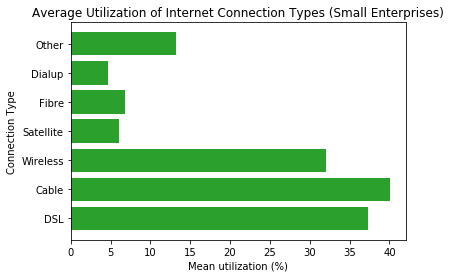

In [6]:
#Create lists containing data for small, medium, and large enterprises.
#Each value in the list contains data for a particular type of internet connection.
#e.g. small = [30,50,20]. Arbitrarily say that indices are (DSL, cable, wireless). 30% are small DSL, 50% are small cable,
# 20% are small wireless. This would total to 100% or above if the company has more than one service. 

#Define 3 lists representing each size of enterprise.
small = []
medium = []
large = []

#Filter for small enterprise, appending mean percentages in the order: DSL, Cable, Wireless, Satellite, Fibre, Dialup, Other
SmallDSL = dfSmall[dfSmall['Type'] == 'Digital Subscriber Line']
small.append(SmallDSL['Value'].mean())
SmallCable = dfSmall[dfSmall['Type']== 'Cable modem']
small.append(SmallCable['Value'].mean())
SmallWireless = dfSmall[dfSmall['Type']== 'Mobile wireless']
small.append(SmallWireless['Value'].mean())
smallSat = dfSmall[dfSmall['Type']== 'Satellite']
small.append(smallSat['Value'].mean())
smallFibre = dfSmall[dfSmall['Type']== 'Fibre optic line']
small.append(smallFibre['Value'].mean())
SmallDialup = dfSmall[dfSmall['Type']== 'Dial-up over a telephone line']
small.append(SmallDialup['Value'].mean())
SmallOther = dfSmall[dfSmall['Type']== 'Fixed wireless or portable Wi-Fi hotspot']
small.append(SmallOther['Value'].mean())

#Filter for medium enterprise, appending mean percentages in the same order as above.
MedDSL = dfMed[dfMed['Type'] == 'Digital Subscriber Line']
medium.append(MedDSL['Value'].mean())
MedCable = dfMed[dfMed['Type']== 'Cable modem']
medium.append(MedCable['Value'].mean())
MedWireless = dfMed[dfMed['Type']== 'Mobile wireless']
medium.append(MedWireless['Value'].mean())
MedSat = dfMed[dfMed['Type']== 'Satellite']
medium.append(MedSat['Value'].mean())
MedFibre = dfMed[dfMed['Type']== 'Fibre optic line']
medium.append(MedFibre['Value'].mean())
MedDialup = dfMed[dfMed['Type']== 'Dial-up over a telephone line']
medium.append(MedDialup['Value'].mean())
MedOther = dfMed[dfMed['Type']== 'Fixed wireless or portable Wi-Fi hotspot']
medium.append(MedOther['Value'].mean())

#Filter for large enterprise, appending mean percentages in the same order as above.
LargeDSL = dfLarge[dfLarge['Type'] == 'Digital Subscriber Line']
large.append(LargeDSL['Value'].mean())
LargeCable = dfLarge[dfLarge['Type']== 'Cable modem']
large.append(LargeCable['Value'].mean())
LargeWireless = dfLarge[dfLarge['Type']== 'Mobile wireless']
large.append(LargeWireless['Value'].mean())
LargeSat = dfLarge[dfLarge['Type']== 'Satellite']
large.append(LargeSat['Value'].mean())
LargeFibre = dfLarge[dfLarge['Type']== 'Fibre optic line']
large.append(LargeFibre['Value'].mean())
LargeDialup = dfLarge[dfLarge['Type']== 'Dial-up over a telephone line']
large.append(LargeDialup['Value'].mean())
LargeOther = dfLarge[dfLarge['Type']== 'Fixed wireless or portable Wi-Fi hotspot']
large.append(LargeOther['Value'].mean())

#Test print the arrays to ensure they contain accurate results.
#print(small)
#print(medium)
#print(large)

names = ['DSL', 'Cable', 'Wireless', 'Satellite', 'Fibre', 'Dialup', 'Other']
plt.barh(names, small, color='tab:green')
plt.ylabel('Connection Type')
plt.xlabel('Mean utilization (%)')
plt.title('Average Utilization of Internet Connection Types (Small Enterprises)')

From the visualization above, we can see that, on average, the most utilized connection type for a small enterprise is cable services, with around 40% utilization. We can use this information and repeat for medium and large enterprises, combining them onto a single plot.

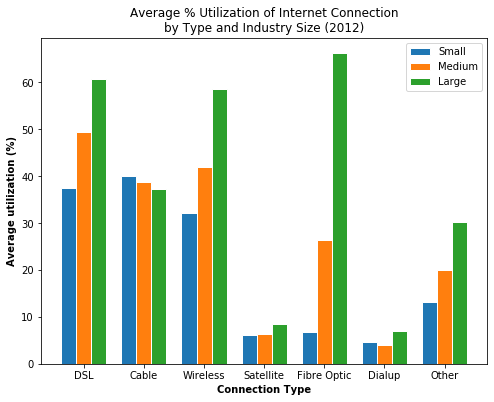

In [15]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(small))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(8,6))
# Make the plot
plt.bar(r1, small, color='tab:blue', width=barWidth, edgecolor='white', label='Small')
plt.bar(r2, medium, color='tab:orange', width=barWidth, edgecolor='white', label='Medium')
plt.bar(r3, large, color='tab:green', width=barWidth, edgecolor='white', label='Large')
 
# Add xticks on the middle of the group bars
plt.xlabel('Connection Type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(small))], ['DSL', 'Cable', 'Wireless', 'Satellite', 'Fibre Optic', 'Dialup', 'Other'])
plt.ylabel('Average utilization (%)', fontweight='bold')
plt.title('Average % Utilization of Internet Connection\nby Type and Industry Size (2012)')

# Create legend & Show graphic
plt.legend()
plt.show()


# Conclusion

From the plot above, we can see some trends. Clearly, fibre optic is the industry standard of choice for large enterprises. Large enterprises are also reliant on wireless services and DSL, and are also the largest utilizer of other services.
Medium size enterprises appear to heavily rely on DSL services, with wireless and cable being the next most utilized. Fibre optic appears to be less utilized, which could be arributed to medium-sized enterprises not having a business need or resources required.
Small size enterprises appear to heavily rely on traditional cable/DSL internet services. Fibre optic appears to be poorly utilized, which, again could be attributed to lack of business need and potential for lack of resources. 

Overall, the data shows that many enterprises rely on a variety of services. Wireless, DSL, and fibre optic are heavily utilized by large enterprises, suggesting that a big portion of large corporations use a wide variety of services. Perhaps, for example, cell phones for employees, and fibre networks for office buildings. Small and medium companies appear to exhibit similar trends, with DSL, cable, and wireless services being commonly used across the industries.